In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [43]:
#Run this cell when your working directory is /notebooks or change the directory BASE_PATH according to your working path

#Defining DATA_PATH
'''os.chdir("..")
DATA_PATH = os.path.join(os.getcwd(), "dataset")
os.chdir(DATA_PATH)'''

#Defining BASE_PATH
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), "..", "dataset"))

train_file_path = os.path.join(BASE_PATH, "PAKDD2010_Modeling_Data.csv")
val_file_path = os.path.join(BASE_PATH, "PAKDD2010_Prediction_Data.csv")

print(train_file_path)
print(val_file_path)


/Users/carlos/Desktop/CURSOS/Anyone AI/Credit-Risk-App/dataset/PAKDD2010_Modeling_Data.csv
/Users/carlos/Desktop/CURSOS/Anyone AI/Credit-Risk-App/dataset/PAKDD2010_Prediction_Data.csv


In [44]:
#Loading training data from csv
try:
    df = pd.read_csv(train_file_path)
    print("Training file loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file {train_file_path} was not found.")

try:
    test_df = pd.read_csv(val_file_path)
    print("Test file loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file {train_file_path} was not found.")

Training file loaded successfully!
Test file loaded successfully!


/var/folders/7z/nrkzldz97fb_jcsd_x5s03qh0000gn/T/ipykernel_20956/1006555546.py:3: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(train_file_path)


In [45]:
#Replace empty values with nan to determine best strategy for imputation
#Train df
df.replace(' ', np.nan, inplace=True)
df.replace('', np.nan, inplace=True)

#Test df
test_df.replace(' ', np.nan, inplace=True)
test_df.replace('', np.nan, inplace=True)


In [46]:
#features_to_keep = ["RESIDENCIAL_BOROUGH", "FLAG_MASTERCARD", "FLAG_RESIDENCIAL_PHONE", "PROFESSIONAL_ZIP_3", "RESIDENCIAL_CITY", "RESIDENCIAL_PHONE_AREA_CODE", "RESIDENCIAL_ZIP_3", "SEX", "CITY_OF_BIRTH",
                    #"AGE", "MONTHS_IN_RESIDENCE", "PAYMENT_DAY", "PRODUCT", "PROFESSION_CODE", "QUANT_BANKING_ACCOUNTS", "QUANT_DEPENDANTS", 
                    #"QUANT_SPECIAL_BANKING_ACCOUNTS", "RESIDENCE_TYPE", "RESIDENCIAL_STATE", "STATE_OF_BIRTH", "TARGET_LABEL_BAD"]


features_to_keep = ["FLAG_MASTERCARD", "FLAG_RESIDENCIAL_PHONE", "FLAG_PROFESSIONAL_PHONE", "SEX", "AGE", "MONTHS_IN_RESIDENCE", "PAYMENT_DAY",  "PROFESSION_CODE", "QUANT_BANKING_ACCOUNTS", "QUANT_DEPENDANTS", "RESIDENCE_TYPE",  "RESIDENCIAL_STATE", "STATE_OF_BIRTH", "OCCUPATION_TYPE", "MARITAL_STATUS", "TARGET_LABEL_BAD"]

reduced_train_df = df[features_to_keep].copy()


numeric_features = reduced_train_df.select_dtypes(include=['number'])
categorical_features = reduced_train_df.select_dtypes(include=['object'])

print("================Numeric features==================")
print(numeric_features.columns)
print("================Categorical features==================")
print(categorical_features.columns)

================Numeric features==================
Index(['FLAG_MASTERCARD', 'AGE', 'MONTHS_IN_RESIDENCE', 'PAYMENT_DAY',
       'PROFESSION_CODE', 'QUANT_BANKING_ACCOUNTS', 'QUANT_DEPENDANTS',
       'RESIDENCE_TYPE', 'OCCUPATION_TYPE', 'MARITAL_STATUS',
       'TARGET_LABEL_BAD'],
      dtype='object')
================Categorical features==================
Index(['FLAG_RESIDENCIAL_PHONE', 'FLAG_PROFESSIONAL_PHONE', 'SEX',
       'RESIDENCIAL_STATE', 'STATE_OF_BIRTH'],
      dtype='object')


In [47]:
#Creating a function to visualize the unique values in each variable
def print_type_of_values(df):
    for col in df.columns:
        print(f'{col}: {df[col].unique()}')

In [48]:
print_type_of_values(numeric_features)

FLAG_MASTERCARD: [1 0]
AGE: [ 32  34  27  61  48  40  28  31  41  36  29  19  49  58  69  39  42  47
  30  26  60  45  56  71  38  53  79  22  37  55  25  67  21  50  51  84
  43  44  57  33  20  63  62  24  54  64  92  65  73  91  35  76  80  59
  46  70  66  52  23  77  68  18  74  72  75  78  83  81  98  97  85  90
  87  82  17  86  94  89  88  96 106  95  99 101  93   6 100   7  14]
MONTHS_IN_RESIDENCE: [ 15.   1.  nan  12.   4.   0.   5.  10.   6.   2.   3.  18.  25.  14.
  16.   8.   7.  20.   9.  17.  30.  11.  37.  22.  33.  26.  40.  32.
  29.  23.  13.  36.  45.  60.  34.  21.  31.  35.  38.  39.  24.  19.
  48.  28.  52.  49.  46.  27.  42.  62.  51.  82.  44.  68.  71.  50.
  47.  41.  57.  69.  55. 200.  53. 100.  72.  43.  70.  54.  56.  80.
  65.  90.  58.  96.  64.  76.  84.  73.  59. 228.  63. 101.  99.  66.
  67.  78.  61.  81.  89.]
PAYMENT_DAY: [ 5 15 20 10 25  1]
PROFESSION_CODE: [ 9. 11. nan  0.  2. 13.  7. 12.  6. 16.  8. 10. 15. 17.  3.  4.  5. 18.
 14.  1.]
QUA

In [49]:
print_type_of_values(categorical_features)

FLAG_RESIDENCIAL_PHONE: ['Y' 'N']
FLAG_PROFESSIONAL_PHONE: ['N' 'Y']
SEX: ['F' 'M' 'N' nan]
RESIDENCIAL_STATE: ['RN' 'RJ' 'PE' 'MG' 'BA' 'SP' 'RS' 'CE' 'AP' 'MS' 'DF' 'PB' 'MA' 'PA'
 'GO' 'PR' 'MT' 'AL' 'ES' 'SC' 'AM' 'RO' 'PI' 'RR' 'TO' 'SE' 'AC']
STATE_OF_BIRTH: ['RN' 'RJ' 'PE' 'MG' 'BA' 'SP' 'RS' 'CE' 'PA' 'PB' 'MA' nan 'GO' 'AC' 'MT'
 'AL' 'AP' 'TO' 'SC' 'PR' 'MS' 'DF' 'PI' 'RO' 'ES' 'AM' 'SE' 'RR' 'XX']


In [50]:
ohe_enc_features = ["AGE", "MONTHS_IN_RESIDENCE", "PAYMENT_DAY",  "PROFESSION_CODE", "QUANT_BANKING_ACCOUNTS", "QUANT_DEPENDANTS", "RESIDENCE_TYPE",  
                    "RESIDENCIAL_STATE", "STATE_OF_BIRTH", "OCCUPATION_TYPE", "MARITAL_STATUS"]

ordinal_enc_features = ["FLAG_RESIDENCIAL_PHONE", "FLAG_PROFESSIONAL_PHONE", "SEX"]

#freq_enc_features = ['RESIDENCIAL_BOROUGH', 'PROFESSIONAL_ZIP_3', 'RESIDENCIAL_CITY', 'RESIDENCIAL_ZIP_3', 'CITY_OF_BIRTH'] 



In [51]:

reduced_train_df['SEX'] = reduced_train_df['SEX'].replace({'N': 'M'})



In [52]:
from sklearn.model_selection import train_test_split

# Split the set to get features and target variable
X = reduced_train_df.drop(columns=['TARGET_LABEL_BAD'])  # Features
y = reduced_train_df['TARGET_LABEL_BAD']  # Target variable

# Split the data into training (80%) and validation (20%) sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"Training Features Shape: {X_train.shape}")
print(f"Validation Features Shape: {X_valid.shape}")


Training Features Shape: (40000, 15)
Validation Features Shape: (10000, 15)


In [ ]:
print(type(X_train))


<class 'pandas.core.frame.DataFrame'>


In [54]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

In [55]:

print('====================Continuous=======================')
print(X_train[ohe_enc_features].isna().sum())
print('=====================Discrete======================')
print(X_train[ordinal_enc_features].isna().sum())
print('=====================Categorical======================')
#print(X_train[freq_enc_features].isna().sum())


====================Continuous=======================
AGE                          0
MONTHS_IN_RESIDENCE       3022
PAYMENT_DAY                  0
PROFESSION_CODE           6247
QUANT_BANKING_ACCOUNTS       0
QUANT_DEPENDANTS             0
RESIDENCE_TYPE            1108
RESIDENCIAL_STATE            0
STATE_OF_BIRTH            1631
OCCUPATION_TYPE           5894
MARITAL_STATUS               0
dtype: int64
=====================Discrete======================
FLAG_RESIDENCIAL_PHONE      0
FLAG_PROFESSIONAL_PHONE     0
SEX                        12
dtype: int64
=====================Categorical======================


In [27]:
ohe_enc_features = ["AGE", "MONTHS_IN_RESIDENCE", "PAYMENT_DAY",  "PROFESSION_CODE", "QUANT_BANKING_ACCOUNTS", "QUANT_DEPENDANTS", "RESIDENCE_TYPE",  
                    "RESIDENCIAL_STATE", "STATE_OF_BIRTH", "OCCUPATION_TYPE", "MARITAL_STATUS"]

ordinal_enc_features = ["FLAG_RESIDENCIAL_PHONE", "FLAG_PROFESSIONAL_PHONE", "SEX"]

#freq_enc_features = ['RESIDENCIAL_BOROUGH', 'PROFESSIONAL_ZIP_3', 'RESIDENCIAL_CITY', 'RESIDENCIAL_ZIP_3', 'CITY_OF_BIRTH'] 


In [56]:
ohe_feat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

ordinal_feat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', ohe_feat_transformer, ohe_enc_features),
        ('ord', ordinal_feat_transformer, ordinal_enc_features)
    ])

In [57]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('ohe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['AGE', 'MONTHS_IN_RESIDENCE', 'PAYMENT_DAY',
                                  'PROFESSION_CODE', 'QUANT_BANKING_ACCOUNTS',
                                  'QUANT_DEPENDANTS', 'RESIDENCE_TYPE',
                                  'RESIDENCIAL_STATE', 'STATE_OF_BIRTH',
                                  'OCCUPATION_TYPE', 'MARITAL_STATUS']),
                                ('ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['FLAG_RESIDENCIAL_PHONE',
                                  'FLAG_PROFESSIONAL_PHONE', 'SEX'])])

In [62]:
transformed_train_data = preprocessor.transform(X_train)
transformed_val_data = preprocessor.transform(X_valid)

In [64]:
X_train_transformed = pd.DataFrame(transformed_train_data, columns=preprocessor.get_feature_names_out())
X_valid_transformed = pd.DataFrame(transformed_val_data, columns=preprocessor.get_feature_names_out()) 

In [65]:
print(X_train_transformed.shape)
print(X_valid_transformed.shape)

(40000, 293)
(10000, 293)


In [67]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Configuramos una semilla aleatoria para reproducibilidad
np.random.seed(42)

# Suponemos que ya tienes estos datos disponibles:
# train_df, y_train, val_df, y_valid

# Calculamos el ratio de desbalanceo para scale_pos_weight
# La fórmula básica es: número de muestras de clase negativa / número de muestras de clase positiva
neg_pos_ratio = np.sum(y_train == 0) / np.sum(y_train == 1)
print(f"Ratio de desbalanceo (neg/pos): {neg_pos_ratio:.4f}")

# Función para evaluar y visualizar resultados
def evaluate_and_display(model, X_train, y_train, X_val, y_val, model_name):
    # Predicciones
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Probabilidades para ROC-AUC
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_val_proba = model.predict_proba(X_val)[:, 1]
     
    # Métricas de validación
    val_metrics = {
        'accuracy': accuracy_score(y_val, y_val_pred),
        'precision': precision_score(y_val, y_val_pred),
        'recall': recall_score(y_val, y_val_pred),
        'f1': f1_score(y_val, y_val_pred),
        'roc_auc': roc_auc_score(y_val, y_val_proba)
    }
    
    # Matriz de confusión
    val_cm = confusion_matrix(y_val, y_val_pred)
    
    # Imprimir resultados
    print(f"\n===== {model_name} =====")    
    print("\nMétricas de validación:")
    for metric, value in val_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    # Mostrar matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Clase 0', 'Clase 1'],
                yticklabels=['Clase 0', 'Clase 1'])
    plt.xlabel('Predicción')
    plt.ylabel('Valor real')
    plt.title(f'Matriz de confusión - {model_name}')
    plt.tight_layout()
    plt.show()
    
    # Informe de clasificación
    print("\nInforme de clasificación (validación):")
    print(classification_report(y_val, y_val_pred))
    
    # Importancia de características
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X_train_transformed.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)

        print(feature_importance.head(50))
        
        '''
        # Mostrar top 15 características más importantes o todas si hay menos de 15
        n_features = min(15, len(feature_importance))
        plt.figure(figsize=(10, 8))
        sns.barplot(x='importance', y='feature', data=feature_importance.head(n_features))
        plt.title('Top 15 características más importantes')
        plt.tight_layout()
        plt.show()
        '''
    
    return val_metrics, y_val_proba

Ratio de desbalanceo (neg/pos): 2.8547



Entrenando modelo base con scale_pos_weight...

===== XGBoost Base con scale_pos_weight =====

Métricas de validación:
accuracy: 0.5788
precision: 0.3314
recall: 0.5713
f1: 0.4195
roc_auc: 0.6073


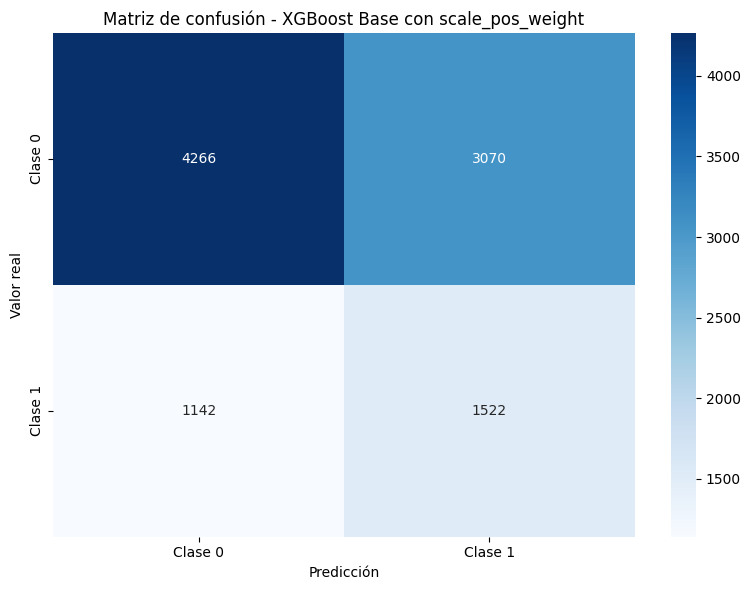


Informe de clasificación (validación):
              precision    recall  f1-score   support

           0       0.79      0.58      0.67      7336
           1       0.33      0.57      0.42      2664

    accuracy                           0.58     10000
   macro avg       0.56      0.58      0.54     10000
weighted avg       0.67      0.58      0.60     10000

                           feature  importance
277       ohe__OCCUPATION_TYPE_1.0    0.040436
283          ohe__MARITAL_STATUS_1    0.019705
290    ord__FLAG_RESIDENCIAL_PHONE    0.018885
173             ohe__PAYMENT_DAY_5    0.014888
177            ohe__PAYMENT_DAY_25    0.014125
48                     ohe__AGE_63    0.013041
3                      ohe__AGE_18    0.011775
59                     ohe__AGE_74    0.010989
38                     ohe__AGE_53    0.010529
6                      ohe__AGE_21    0.010445
15                     ohe__AGE_30    0.010347
286          ohe__MARITAL_STATUS_4    0.010228
217        ohe__RESIDE

In [68]:

# Modelo base con scale_pos_weight básico
print("\nEntrenando modelo base con scale_pos_weight...")
base_model = xgb.XGBClassifier(
    scale_pos_weight=neg_pos_ratio,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)
base_model.fit(X_train_transformed, y_train)

# Evaluamos el modelo base
base_metrics, base_proba = evaluate_and_display(
    base_model, X_train_transformed, y_train, X_valid_transformed, y_valid, 
    "XGBoost Base con scale_pos_weight"
)


Iniciando búsqueda de hiperparámetros...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Tiempo total de búsqueda: 1.92 minutos

Mejores hiperparámetros encontrados:
subsample: 0.6
scale_pos_weight: 4.282017924255565
reg_lambda: 1
reg_alpha: 0
n_estimators: 500
min_child_weight: 1
max_depth: 3
learning_rate: 0.1
gamma: 0.5
colsample_bytree: 0.7

===== XGBoost Optimizado con scale_pos_weight =====

Métricas de validación:
accuracy: 0.4398
precision: 0.3009
recall: 0.8333
f1: 0.4421
roc_auc: 0.6216


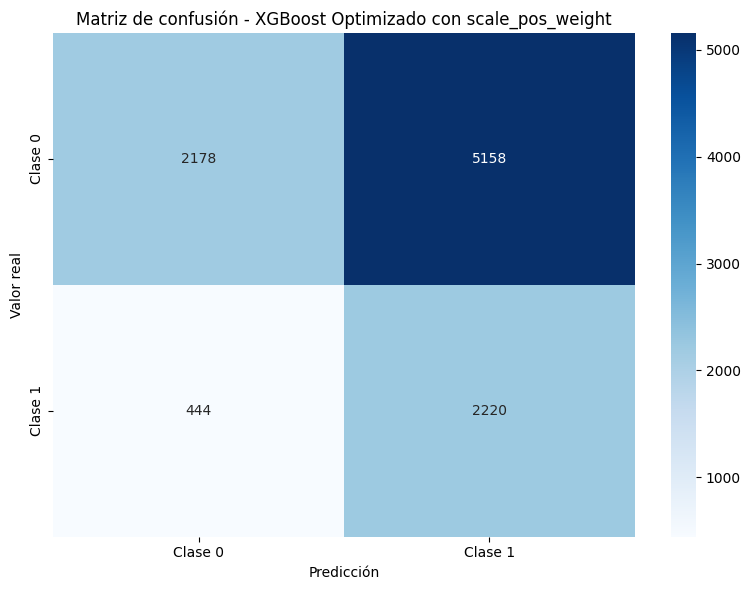


Informe de clasificación (validación):
              precision    recall  f1-score   support

           0       0.83      0.30      0.44      7336
           1       0.30      0.83      0.44      2664

    accuracy                           0.44     10000
   macro avg       0.57      0.57      0.44     10000
weighted avg       0.69      0.44      0.44     10000

                           feature  importance
283          ohe__MARITAL_STATUS_1    0.011408
277       ohe__OCCUPATION_TYPE_1.0    0.010142
177            ohe__PAYMENT_DAY_25    0.009450
290    ord__FLAG_RESIDENCIAL_PHONE    0.009159
48                     ohe__AGE_63    0.007256
3                      ohe__AGE_18    0.007111
245      ohe__RESIDENCIAL_STATE_SC    0.007063
52                     ohe__AGE_67    0.007061
174            ohe__PAYMENT_DAY_10    0.006624
5                      ohe__AGE_20    0.006578
40                     ohe__AGE_55    0.006436
44                     ohe__AGE_59    0.006350
244      ohe__RESIDENC

In [69]:
# Definimos el espacio de hiperparámetros para la búsqueda
# Aquí incluimos varios valores de scale_pos_weight alrededor del ratio calculado
# para encontrar el valor óptimo
param_space = {
    'scale_pos_weight': [1, neg_pos_ratio/2, neg_pos_ratio, neg_pos_ratio*1.5, neg_pos_ratio*2],
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5],
    'min_child_weight': [1, 3, 5, 7],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [0, 0.1, 1, 10]
}

print("\nIniciando búsqueda de hiperparámetros...")
start_time = time.time()

# Definimos la validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definimos la búsqueda aleatoria
search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', random_state=42),
    param_distributions=param_space,
    n_iter=50,  # Número de combinaciones a probar
    scoring='f1',  # Optimizamos para F1 score
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ejecutamos la búsqueda
search.fit(X_train_transformed, y_train)

# Tiempo total de búsqueda
end_time = time.time()
print(f"\nTiempo total de búsqueda: {(end_time - start_time)/60:.2f} minutos")

# Mostramos los mejores parámetros encontrados
print("\nMejores hiperparámetros encontrados:")
for param, value in search.best_params_.items():
    print(f"{param}: {value}")

# Evaluamos el modelo optimizado
best_model = search.best_estimator_
tuned_metrics, tuned_proba = evaluate_and_display(
    best_model, X_train_transformed, y_train, X_valid_transformed, y_valid, 
    "XGBoost Optimizado con scale_pos_weight"
)


===== Comparación de modelos =====
     Métrica  Modelo Base  Modelo Optimizado  Mejora (%)
0   accuracy     0.578800           0.439800  -24.015204
1  precision     0.331446           0.300895   -9.217623
2     recall     0.571321           0.833333   45.860710
3         f1     0.419515           0.442143    5.393877
4    roc_auc     0.607274           0.621623    2.362910

Umbral óptimo para F1-score: 0.550


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


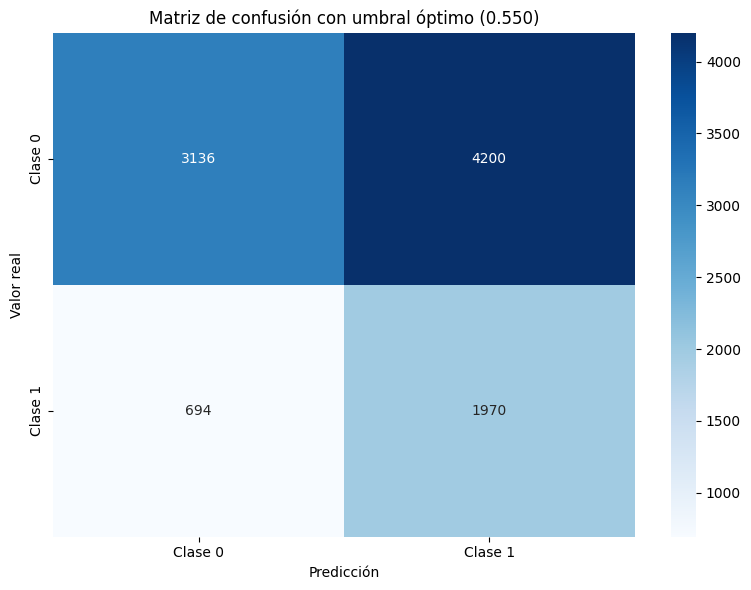


===== RESUMEN FINAL =====
Ratio de desbalanceo original: 2.8547
scale_pos_weight óptimo: 4.2820
Otros hiperparámetros óptimos: 
  - subsample: 0.6
  - reg_lambda: 1
  - reg_alpha: 0
  - n_estimators: 500
  - min_child_weight: 1
  - max_depth: 3
  - learning_rate: 0.1
  - gamma: 0.5
  - colsample_bytree: 0.7

Mejor umbral de clasificación: 0.550

Métricas finales (con umbral óptimo):
Accuracy: 0.5106
Precision: 0.3193
Recall: 0.7395
F1-score: 0.4460
ROC-AUC: 0.6216

Mejora porcentual respecto al modelo base:
accuracy: -11.78%
precision: -3.67%
recall: 29.43%
f1: 6.31%
roc_auc: 2.36%
                           feature  importance
283          ohe__MARITAL_STATUS_1    0.011408
277       ohe__OCCUPATION_TYPE_1.0    0.010142
177            ohe__PAYMENT_DAY_25    0.009450
290    ord__FLAG_RESIDENCIAL_PHONE    0.009159
48                     ohe__AGE_63    0.007256
3                      ohe__AGE_18    0.007111
245      ohe__RESIDENCIAL_STATE_SC    0.007063
52                     ohe__AGE_67

In [71]:
# Comparamos métricas entre modelo base y optimizado
metrics_comparison = pd.DataFrame({
    'Métrica': list(base_metrics.keys()),
    'Modelo Base': list(base_metrics.values()),
    'Modelo Optimizado': list(tuned_metrics.values()),
    'Mejora (%)': [(tuned_metrics[k] - base_metrics[k])/base_metrics[k]*100 for k in base_metrics.keys()]
})

print("\n===== Comparación de modelos =====")
print(metrics_comparison)

# Exploramos el efecto del umbral de decisión
thresholds_to_try = np.arange(0.1, 1.0, 0.05)
threshold_results = []

for threshold in thresholds_to_try:
    # Aplicamos el umbral a las probabilidades del modelo optimizado
    y_val_pred_threshold = (tuned_proba >= threshold).astype(int)
    
    # Calculamos métricas con este umbral
    accuracy = accuracy_score(y_valid, y_val_pred_threshold)
    precision = precision_score(y_valid, y_val_pred_threshold)
    recall = recall_score(y_valid, y_val_pred_threshold)
    f1 = f1_score(y_valid, y_val_pred_threshold)
    
    threshold_results.append({
        'threshold': threshold,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })

# Convertimos a DataFrame para facilitar la visualización
threshold_df = pd.DataFrame(threshold_results)

# Identificamos el umbral óptimo para F1-score
best_f1_idx = threshold_df['f1'].idxmax()
best_threshold = threshold_df.loc[best_f1_idx, 'threshold']
print(f"\nUmbral óptimo para F1-score: {best_threshold:.3f}")

# Matriz de confusión con el umbral óptimo
y_val_pred_optimal = (tuned_proba >= best_threshold).astype(int)
cm_optimal = confusion_matrix(y_valid, y_val_pred_optimal)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 0', 'Clase 1'],
            yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title(f'Matriz de confusión con umbral óptimo ({best_threshold:.3f})')
plt.tight_layout()
plt.show()

# Guardar el modelo optimizado
#best_model.save_model('xgboost_best_model_scale_pos_weight.json')
#print("\nEl modelo optimizado ha sido guardado como 'xgboost_best_model_scale_pos_weight.json'")

# Resumen final
print("\n===== RESUMEN FINAL =====")
print(f"Ratio de desbalanceo original: {neg_pos_ratio:.4f}")
print(f"scale_pos_weight óptimo: {search.best_params_['scale_pos_weight']:.4f}")
print(f"Otros hiperparámetros óptimos: ")
for param, value in search.best_params_.items():
    if param != 'scale_pos_weight':
        print(f"  - {param}: {value}")

print(f"\nMejor umbral de clasificación: {best_threshold:.3f}")
print("\nMétricas finales (con umbral óptimo):")
print(f"Accuracy: {accuracy_score(y_valid, y_val_pred_optimal):.4f}")
print(f"Precision: {precision_score(y_valid, y_val_pred_optimal):.4f}")
print(f"Recall: {recall_score(y_valid, y_val_pred_optimal):.4f}")
print(f"F1-score: {f1_score(y_valid, y_val_pred_optimal):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_valid, tuned_proba):.4f}")

# Comparativa final de mejora
print("\nMejora porcentual respecto al modelo base:")
optimal_metrics = {
    'accuracy': accuracy_score(y_valid, y_val_pred_optimal),
    'precision': precision_score(y_valid, y_val_pred_optimal),
    'recall': recall_score(y_valid, y_val_pred_optimal),
    'f1': f1_score(y_valid, y_val_pred_optimal),
    'roc_auc': roc_auc_score(y_valid, tuned_proba)
}

for metric in optimal_metrics:
    improvement = (optimal_metrics[metric] - base_metrics[metric])/base_metrics[metric]*100
    print(f"{metric}: {improvement:.2f}%")


if hasattr(best_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X_train_transformed.columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False)

print(feature_importance.head(40))

In [ ]:
#Creando pipeline de procesamiento de datos junto con modelo entrenado
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_model)
])

In [ ]:
# Exportando el modelo junto con el pipeline de procesamiento de datos
import pickle

with open('predict_model.pkl', 'wb') as f:
    pickle.dump(model_pipeline, f)

# La forma en que se deben pasar los datos es de acuerdo a la siguiente lista y ejemplos:

In [124]:
# Orden de los datos

print(X.iloc[15])

FLAG_MASTERCARD               1
FLAG_RESIDENCIAL_PHONE        N
FLAG_PROFESSIONAL_PHONE       Y
SEX                           F
AGE                          49
MONTHS_IN_RESIDENCE        18.0
PAYMENT_DAY                  20
PROFESSION_CODE             2.0
QUANT_BANKING_ACCOUNTS        0
QUANT_DEPENDANTS              1
RESIDENCE_TYPE              1.0
RESIDENCIAL_STATE            CE
STATE_OF_BIRTH               CE
OCCUPATION_TYPE             4.0
MARITAL_STATUS                2
Name: 15, dtype: object


In [ ]:

#Ejemplos

columns = [x for x in reduced_train_df.columns if x != 'TARGET_LABEL_BAD'] 


new_value = pd.DataFrame([[1, 'N', 'Y', 'F', 49, 18.0, 20, 2.0, 0, 1, 1.0, 'CE', 'CE', 4.0, 2]],
                         columns=columns)


new_value_2 = pd.DataFrame([[0, 'Y', 'N', 'F', 31, 0.0, 15, 0.0, 1, 0, 1.0, 'SP', 'SP', 2.0, 1]],
                         columns=columns)


In [ ]:
# Ejemplo de una predicción individual
print(model_pipeline.predict(new_value))

[0]


In [ ]:
# Ejemplo prediciendo 50 valores para confirmar que las predicciones son diferentes dependiendo de los datos
print(model_pipeline.predict(X.head(50)))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 0 0 1 1 0 0 1 1 1 1 1 1 1]
